In [12]:
# variable initialization 
from keras import Input, Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Concatenate, Activation, Dropout, Flatten, Dense

nb_filters =100
kernel_size= {}
kernel_size[0]= [3,3]
kernel_size[1]= [4,4]
kernel_size[2]= [5,5]
input_shape=(32, 32, 3)
pool_size = (2,2)
nb_classes =2
no_parallel_filters = 3

# create seperate model graph for parallel processing with different filter sizes
# apply 'same' padding so that ll produce o/p tensor of same size for concatination
# cancat all paralle output

inp = Input(shape=input_shape)
convs = []
for k_no in range(len(kernel_size)):
    conv = Conv2D(nb_filters, kernel_size[k_no][0], kernel_size[k_no][1],
                    border_mode='same',
                         activation='relu',
                    input_shape=input_shape)(inp)
    pool = MaxPooling2D(pool_size=pool_size)(conv)
    convs.append(pool)

if len(kernel_size) > 1:
    out = Concatenate()(convs)
else:
    out = convs[0]

conv_model = Model(input=inp, output=out)

# add created model grapg in sequential model

model = Sequential()
model.add(conv_model)        # add model just like layer
model.add(Conv2D(nb_filters, kernel_size[1][0], kernel_size[1][0]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('tanh'))

Using TensorFlow backend.
/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (4, 4), activation="relu", input_shape=(32, 32, 3..., padding="same")`
/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (5, 5), activation="relu", input_shape=(32, 32, 3..., padding="same")`
/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:40:

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 16, 16, 300)       15300     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 100)       480100    
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 100)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 100)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

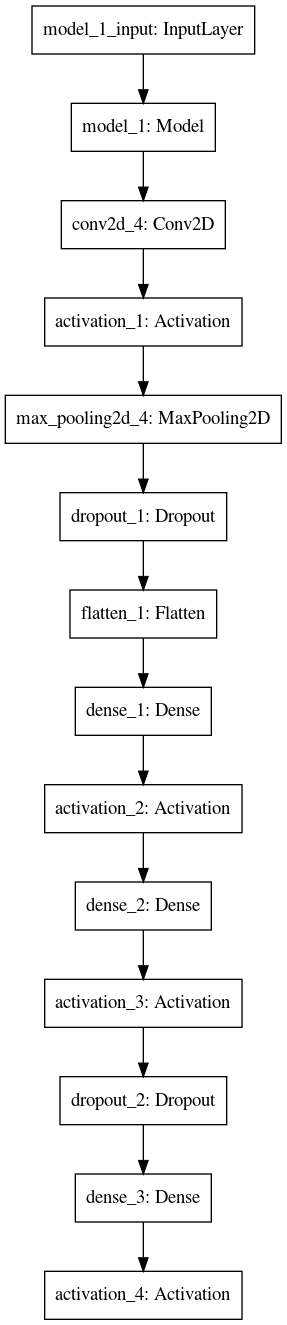

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

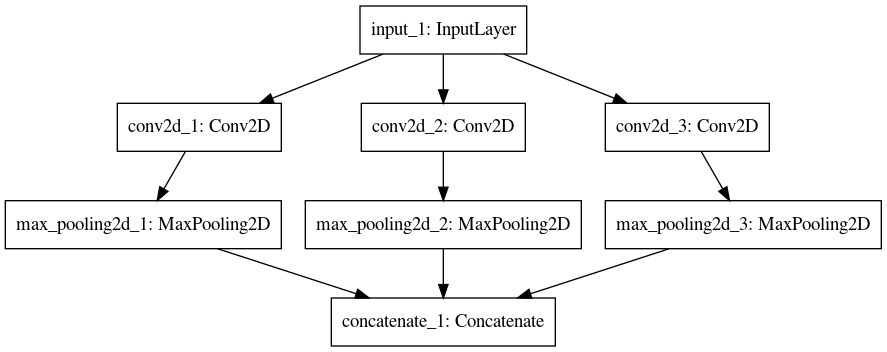

In [49]:
plot_model(conv_model, to_file='model.png')

In [50]:
import scipy.io as io
import numpy as np

In [51]:
test_datamat = io.loadmat('indian_pines_Test_patch_3.mat')
test_data = test_datamat['test_patch']
test_labels = test_datamat['test_labels'].transpose()
# channels = test_data.shape[2] #test_data.shape[1]

train_datamat = io.loadmat('indian_pines_Train_patch_3.mat')
train_data = train_datamat['train_patch']
train_labels = train_datamat['train_labels'].transpose()

In [52]:
train_labels1 = train_labels.ravel()
trainLabels = np.zeros((train_labels1.size, train_labels1.max()+1))
trainLabels[np.arange(train_labels1.size),train_labels1] = 1

In [53]:
test_labels1 = test_labels.ravel()
testLabels = np.zeros((test_labels1.size, test_labels1.max()+1))
testLabels[np.arange(test_labels1.size),test_labels1] = 1

In [54]:
train_data.shape

(1600, 220, 3, 3)

In [65]:
# variable initialization 
from keras import Input, Model, Sequential
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Concatenate, Activation, Dropout, Flatten, Dense, Reshape

nbands = 10
block1_size1 = 220
channels = 220
band_size = 22
patch_size = 3
nclasses = 9

# nb_filters = 100
# kernel_size = [3, 3]
# input_shape = []
# inp = Input(shape=input_shape)
# convs = []
# for i in range(nbands):
#     conv = Conv2D(nb_filters, kernel_size[0], kernel_size[1], border_mode='same',
#                     activation='relu', input_shape=input_shape)(inp)
#     pool = MaxPooling2D(pool_size=pool_size)(conv)
#     convs.append(pool)
# out = Concatenate()(convs)

# parallelModel = Model(input=inp, output=out)


modelList = []
inputShape = [band_size, patch_size*patch_size]
for i in range(nbands):
    inp = Input(shape=inputShape)
    reshape1 = Reshape((band_size, patch_size*patch_size))(inp)
#     re1 = reshape1(inp)
    conv1 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(reshape1)
    conv2 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(conv1)
    conv3 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(conv2)
    conv4 = Conv1D(filters = 10, kernel_size = 3, strides = 1, activation="relu")(conv3)
    conv5 = Conv1D(filters = 5, kernel_size = 5, strides = 1, activation="relu")(conv4)
#     reshape2 = Reshape(((band_size-10)*5, 1))(conv5)
    reshape2 = Flatten()(conv5)
    modelList.append(reshape2)
    
modelConc = Concatenate()(modelList)
modelParallel = Model(input=inp, output=modelConc)
    
# model = Sequential()
# model.add(Reshape(band_size, patch_size*patch_size))
# model.add(Conv1D(20, 3, 1, activation="relu"))
# model.add(Conv1D(20, 3, 1, activation="relu"))
# model.add(Conv1D(20, 3, 1, activation="relu"))
# model.add(Conv1D(10, 3, 1, activation="relu"))
# model.add(Conv1D(5, 5, 1, activation="relu"))
# model.add(Reshape((band_size-10)*5, 1))

# model = nn.Sequential()
# model:add(nn.Reshape(opt.band_size, opt.patch_size*opt.patch_size))
# nn.TemporalConvolution(inputFrameSize, outputFrameSize, kW, [dW])
# input - nInputFrame*inputFrameSize, output - nOutputFrame*outputFrameSize
# nOutputFrame = (nInputFrame - kW) / dW + 1
# model:add(nn.TemporalConvolution(opt.patch_size*opt.patch_size, 20, 3, 1))
# model:add(nn.ReLU())
# model:add(nn.TemporalConvolution(20, 20, 3, 1))
# model:add(nn.ReLU())
# model:add(nn.TemporalConvolution(20, 10, 3, 1))
# model:add(nn.ReLU())
# model:add(nn.TemporalConvolution(10, 5, 5, 1))
# model:add(nn.ReLU())
# model:add(nn.Reshape((opt.band_size-10)*5, 1))

# parallel_model = nn.Parallel(2, 2)
# for i = 1, opt.nbands do
#     parallel_model:add(model:clone())
# end


net = Sequential()
net.add(Conv2D(channels, kernel_size = 1, strides = 1, activation="relu"))
net.add(Reshape((nbands, band_size, patch_size*patch_size)))
net.add(modelParallel)
net.add(Flatten()) # net.add(Reshape(nbands*(band_size-10)*5))
net.add(Dense(100)) 
net.add(Activation("relu"))
net.add(Dropout(0.5))
net.add(Dense(nclasses))
net.add(Activation("softmax"))
# net:add(nn.SpatialConvolution(opt.channels, opt.block1_conv1, 1, 1))
# net:add(nn.ReLU())
# net:add(nn.Reshape(opt.nbands, opt.band_size, opt.patch_size*opt.patch_size))
# net:add(parallel_model)
# net:add(nn.Reshape(opt.nbands*(opt.band_size-10)*5))
# net:add(nn.Linear(opt.nbands*(opt.band_size-10)*5, 100))
# net:add(nn.ReLU())
# net:add(nn.Dropout())
# net:add(nn.Linear(100, opt.nclasses))
# net:add(nn.LogSoftMax())

/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_70:0", shape=(None, 22, 9), dtype=float32) at layer "input_70". The following previous layers were accessed without issue: ['input_71']

In [20]:
net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
net.fit(train_data, trainLabels, validation_data=(test_data, testLabels), epochs=20)

Train on 1600 samples, validate on 7434 samples
Epoch 1/3
1600/1600 [==============================] - 33s 20ms/step - loss: 1.5102 - accuracy: 0.4044 - val_loss: 1.2553 - val_accuracy: 0.5082
Epoch 2/3
1600/1600 [==============================] - 27s 17ms/step - loss: 1.1460 - accuracy: 0.5337 - val_loss: 1.1270 - val_accuracy: 0.5825
Epoch 3/3
1600/1600 [==============================] - 29s 18ms/step - loss: 1.0078 - accuracy: 0.6006 - val_loss: 1.0210 - val_accuracy: 0.6364


In [ ]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

tweet_a = Input(shape=(280, 256))
tweet_b = Input(shape=(280, 256))
x 
shared_lstm = LSTM(64)

# When we reuse the same layer instance
# multiple times, the weights of the layer
# are also being reused
# (it is effectively *the same* layer)
encoded_a = shared_lstm(tweet_a)
encoded_b = shared_lstm(tweet_b)

# We can then concatenate the two vectors:
merged_vector = keras.layers.concatenate([encoded_a, encoded_b], axis=-1)

# And add a logistic regression on top
predictions = Dense(1, activation='sigmoid')(merged_vector)

# We define a trainable model linking the
# tweet inputs to the predictions
model = Model(inputs=[tweet_a, tweet_b], outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit([data_a, data_b], labels, epochs=10)

In [ ]:
function train(dataset)
   -- epoch tracker
   epoch = epoch or 1

   -- local vars
   local time = sys.clock()

   -- do one epoch
   print('<trainer> on training set:')
   print("<trainer> online epoch # " .. epoch .. ' [batchSize = ' .. opt.batchSize .. ']')
   for t = 1,dataset:size(),opt.batchSize do

      local inputs = torch.Tensor(opt.batchSize, opt.channels, opt.patch_size, opt.patch_size)

      local targets = torch.Tensor(opt.batchSize)
      if opt.type == "cuda" then
      	inputs:cuda()
      	targets:cuda()
      end
      local k = 1
      for i = t,math.min(t+opt.batchSize-1,dataset:size()) do
         -- load new sample
         local sample = dataset[i]
         local input = sample[1]:clone()
         local _,target = sample[2]:clone():max(1)
         target = target:squeeze()
         inputs[k] = input
         targets[k] = target
         k = k + 1
      end

      -- create closure to evaluate f(X) and df/dX
      local feval = function(x)
         -- get new parameters
         if x ~= parameters then
            parameters:copy(x)
         end
         gradParameters:zero()

         -- evaluate function for complete mini batch
         local outputs = net:forward(inputs)
         local f = criterion:forward(outputs, targets)

         -- estimate df/dW
         local df_do = criterion:backward(outputs, targets)
         net:backward(inputs, df_do)

         -- penax = np.array(x)lties (L1 and L2):
         if opt.coefL1 ~= 0 or opt.coefL2 ~= 0 then
            -- locals:
            local norm,sign= torch.norm,torch.sign

            -- Loss:
            f = f + opt.coefL1 * norm(parameters,1)
            f = f + opt.coefL2 * norm(parameters,2)^2/2

            -- Gradients:
            gradParameters:add( sign(parameters):mul(opt.coefL1) + parameters:clone():mul(opt.coefL2) )
         end

         -- update confusion
         -- print(inputs:size(1))
         for i = 1,opt.batchSize do
            confusion:add(outputs[i], targets[i])
         end

         -- return f and df/dX
         return f,gradParameters
      end

      -- optimize on current mini-batch
      if opt.optimization == "Adam" then

      	 adamState = adamState or {
      	 	learningRate = opt.learningRate,
      	 	momentum = opt.momentum,
      	 	learningRateDecay = 5e-9
      	 }
      	 optim.adam(feval, parameters, adamState)
         -- disp progress
         xlua.progress(t, dataset:size())

      else
         error('unknown optimization method')
      end
   end
   
   -- time taken
   time = sys.clock() - time
   time = time / dataset:size()

   -- print confusion matrix
   print(confusion)
   print('% mean class accuracy (train set)' .. tostring(confusion.totalValid*100))
   trainLogger:add{['% mean class accuracy (train set)'] = confusion.totalValid * 100}
   confusion:zero()
   epoch = epoch + 1
   return (1 - confusion.totalValid)*100
end

In [11]:
batch_data = train_data[:200]
batch_labels = train_labels[:200]

In [11]:
# variable initialization 
from keras import Input, Model, Sequential
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Concatenate, Activation, Dropout, Flatten, Dense, Reshape

nbands = 10
block1_size1 = 220
channels = 220
band_size = 22
patch_size = 3
nclasses = 9

# nb_filters = 100
# kernel_size = [3, 3]
# input_shape = []
# inp = Input(shape=input_shape)
# convs = []
# for i in range(nbands):
#     conv = Conv2D(nb_filters, kernel_size[0], kernel_size[1], border_mode='same',
#                     activation='relu', input_shape=input_shape)(inp)
#     pool = MaxPooling2D(pool_size=pool_size)(conv)
#     convs.append(pool)
# out = Concatenate()(convs)

# parallelModel = Model(input=inp, output=out)


modelList = []
inputShape = [band_size, patch_size*patch_size]
inp = Input(shape=inputShape)
for i in range(nbands):
    reshape1 = Reshape((band_size, patch_size*patch_size))(inp)
#     re1 = reshape1(inp)
    conv1 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(reshape1)
    conv2 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(conv1)
    conv3 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(conv2)
    conv4 = Conv1D(filters = 10, kernel_size = 3, strides = 1, activation="relu")(conv3)
    conv5 = Conv1D(filters = 5, kernel_size = 5, strides = 1, activation="relu")(conv4)
#     reshape2 = Reshape(((band_size-10)*5, 1))(conv5)
    reshape2 = Flatten()(conv5)
    modelList.append(reshape2)
    
modelConc = Concatenate()(modelList)
modelParallel = Model(input=inp, output=modelConc)
    
# model = nn.Sequential()
# model:add(nn.Reshape(opt.band_size, opt.patch_size*opt.patch_size))
# model:add(nn.TemporalConvolution(opt.patch_size*opt.patch_size, 20, 3, 1))
# model:add(nn.ReLU())
# model:add(nn.TemporalConvolution(20, 20, 3, 1))
# model:add(nn.ReLU())
# model:add(nn.TemporalConvolution(20, 10, 3, 1))
# model:add(nn.ReLU())
# model:add(nn.TemporalConvolution(10, 5, 5, 1))
# model:add(nn.ReLU())
# model:add(nn.Reshape((opt.band_size-10)*5, 1))

# parallel_model = nn.Parallel(2, 2)
# for i = 1, opt.nbands do
#     parallel_model:add(model:clone())
# end


net = Sequential()
net.add(Conv2D(channels, kernel_size = 1, strides = 1, activation="relu", data_format="channels_first"))
net.add(Reshape((nbands, band_size, patch_size*patch_size)))
net.add(modelParallel)
net.add(Flatten()) # net.add(Reshape(nbands*(band_size-10)*5))
net.add(Dense(100)) 
net.add(Activation("relu"))
net.add(Dropout(0.5))
net.add(Dense(nclasses))
net.add(Activation("softmax"))
# net:add(nn.SpatialConvolution(opt.channels, opt.block1_conv1, 1, 1))
# net:add(nn.ReLU())
# net:add(nn.Reshape(opt.nbands, opt.band_size, opt.patch_size*opt.patch_size))
# net:add(parallel_model)
# net:add(nn.Reshape(opt.nbands*(opt.band_size-10)*5))
# net:add(nn.Linear(opt.nbands*(opt.band_size-10)*5, 100))
# net:add(nn.ReLU())
# net:add(nn.Dropout())
# net:add(nn.Linear(100, opt.nclasses))
# net:add(nn.LogSoftMax())

/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [16]:
net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
net.fit(train_data, trainLabels, validation_data=(test_data, testLabels), epochs=20)

ValueError: total size of new array must be unchanged

In [41]:
x = []
for i in range(1600):
    x.append(train_data[i][1])
x = np.array(x)

In [66]:
from keras import Input, Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Concatenate, Activation, Dropout, Flatten, Dense

nb_filters =100
kernel_size= {}
kernel_size[0]= [3,3]
kernel_size[1]= [4,4]
kernel_size[2]= [5,5]
input_shape=(32, 32, 3)
pool_size = (2,2)
nb_classes =2
no_parallel_filters = 3

# create seperate model graph for parallel processing with different filter sizes
# apply 'same' padding so that ll produce o/p tensor of same size for concatination
# cancat all paralle output

inp = Input(shape=input_shape)
convs = []
for k_no in range(len(kernel_size)):
    conv = Conv2D(nb_filters, kernel_size[k_no][0], kernel_size[k_no][1],
                    border_mode='same',
                         activation='relu',
                    input_shape=input_shape)(inp)
    pool = MaxPooling2D(pool_size=pool_size)(conv)
    convs.append(pool)

if len(kernel_size) > 1:
    out = Concatenate()(convs)
else:
    out = convs[0]

conv_model = Model(input=inp, output=out)

# add created model grapg in sequential model

model = Sequential()
model.add(conv_model)        # add model just like layer
model.add(Conv2D(nb_filters, kernel_size[1][0], kernel_size[1][0]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('tanh'))

/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (4, 4), activation="relu", input_shape=(32, 32, 3..., padding="same")`
/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (5, 5), activation="relu", input_shape=(32, 32, 3..., padding="same")`
/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Update your 

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit([data_a, data_b], labels, epochs=10)

In [56]:
import numpy as np
import keras
from keras.optimizers import SGD
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Lambda, Flatten, Input, Conv2D, Conv1D, Reshape, Concatenate


# Generate dummy data
# train = np.random.random((400, 220, 3, 3))

y_train = keras.utils.to_categorical(np.random.randint(10, size=(400, 1)), num_classes=10)

inp = Input(shape=train_data.shape[1:])
print(inp.shape)

c1 = Conv2D(220, kernel_size = 1, activation="relu", data_format="channels_first")(inp)
re1 = Reshape((10, 22, 3*3), input_shape = c1.shape)(c1)
# print(c1.shape)
# print("re1", re1.shape)

out = []
for i in range(10):
    reshape1 = Lambda(lambda x: x[:,i,:,:])(re1)  
    rez = re1[:,i,:,:]
#     print("lambda", reshape1.shape)
#     print("rez", rez.shape)
    conv1 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(reshape1)
#     print(conv1.shape)
    conv2 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(conv1)
    conv3 = Conv1D(filters = 10, kernel_size = 3, strides = 1, activation="relu")(conv2)
    conv4 = Conv1D(filters = 5, kernel_size = 5, strides = 1, activation="relu")(conv3)
#     print(conv4.shape)
    reshape2 = Reshape((60, 1), input_shape = conv4.shape)(conv4)
#     print(reshape2.shape)
    out.append(reshape2)
    
outConc = keras.layers.concatenate(out)
# print(outConc.shape)
reshape3 = Flatten()(outConc)
dense = Dense(256, activation='relu')(reshape3)
# print(dense.shape)
op = Dense(9, activation='softmax')(dense)
# print(op.shape)
model = Model(inputs=[inp], outputs=op)

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit([train_data], trainLabels, epochs=10, batch_size=28)

(None, 220, 3, 3)


/home/ajay/anaconda3/envs/baseml/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
1600/1600 [==============================] - 14s 9ms/step - loss: 1.4137 - accuracy: 0.4013
Epoch 2/10
1600/1600 [==============================] - 13s 8ms/step - loss: 1.0113 - accuracy: 0.5619
Epoch 3/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.8800 - accuracy: 0.6219
Epoch 4/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.7917 - accuracy: 0.6825
Epoch 5/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.6882 - accuracy: 0.7337
Epoch 6/10
1600/1600 [==============================] - 10s 6ms/step - loss: 0.6155 - accuracy: 0.7581
Epoch 7/10
1600/1600 [==============================] - 9s 5ms/step - loss: 0.5519 - accuracy: 0.7912
Epoch 8/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.4802 - accuracy: 0.8175
Epoch 9/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.4567 - accuracy: 0.8281
Epoch 10/10
1600/1600 [==============================] - 9s 5ms/step - loss: 

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, trainLabels, validation_data=(test_data, testLabels), epochs=20)

(400, 10)


In [37]:
print(op.shape)

(None, 10)


In [38]:
print(train.shape)

(400, 220, 3, 3)


In [39]:
print(inp.shape)

(None, 220, 3, 3)
